In [1]:
import numpy as np
#Model parameters
input_sz = 3 # of features
layers = [4,3] # layers and # of neurons
output_sz = 2

In [2]:
class NeuralNetwork:
    
    def __init__(self , input_sz , layers , output_sz):
        np.random(seed)
        
        model = {}
        
        model['W1'] = np.random.randn(input_sz,layers[0]) # does random input from normal initialization
        model['b1'] = np.zeros(1,layers[0])  # row vector
        
        model['W2'] = np.random.randn(layers[0],layers[1]) # does random input from normal initialization
        model['b2'] = np.zeros(1,layers[1])  # row vector
        
        model['W3'] = np.random.randn(layers[1],output_sz) # does random input from normal initialization
        model['b3'] = np.zeros(1,output_sz)  # row vector
        
        self.model = model
        

In [3]:
W1 = np.random.randn(input_sz,layers[0])
print(W1) # 3 X 4

[[-1.57504078  0.23088676  1.63274963 -0.50306761]
 [ 0.71569934  0.85365675 -0.0970747   1.33107259]
 [-0.55101975  0.03869619 -1.69917823  0.70602476]]


In [4]:
def softmax(a):
    e_pa = np.exp(a) #vector e_pa
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True) # axis=1 means sum along rows. keepdims=True means preserves dimemsions
    return ans

In [5]:
a = np.array([[10,10],[20,30]])
a_ = softmax(a)
print(a_)

[[5.00000000e-01 5.00000000e-01]
 [4.53978687e-05 9.99954602e-01]]


In [6]:
def forward(self,x):
    
    W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
    b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
    
    z1 = np.dot(x,W1) + b1
    a1 = np.tanh(z1) #like sigmoid , gives ouyput in ranger 1 to -1
    
    z2 = np.dot(a1,W2) + b2
    a2 = np.tanh(z2) #like sigmoid , gives ouyput in ranger 1 to -1
    
    z3 = np.dot(a2,W3) + b3
    y_ = softmax(z3)
    
    self.activation_outputs = (a1,a2,y_)
    return y_
    

In [7]:
def backward(self,x,y,learning_rate = 0.001):
    W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
    b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
    
    delta3 = y_ - y
    
    m = x.shape[0] 
    
    a1,a2,y_ = self.activation_outputs
    
    dw3 = np.dot(a2.T,delta3)
    db3 = np.sum(delta3,axis=0)/float(m)
    
    delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
    dw2 = np.dot(a1.T,delta2)
    db2 = np.sum(delta2,axis=0)/float(m)
    
    delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
    dw1 = np.dot(X.T,delta1)
    db1 = np.sum(delta1,axis=0)/float(m)
    
    #update using gradient decsect
    self.model["W1"] -= learning_rate*dw1
    self.model['b1'] -= learning_rate*db1
    
    self.model["W2"] -= learning_rate*dw2
    self.model['b2'] -= learning_rate*db2
    
    self.model["W3"] -= learning_rate*dw3
    self.model['b3'] -= learning_rate*db3

In [8]:
def predict(self,x):
    y_out = self.forward(x)
    return np.argmax(y_out,axis=1)


In [9]:
def summary(self):
    W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
    a1,a2,y_ = self.activation_outputs
    
    print("W1 ",W1.shape)
    print("A1 ",a1.shape)
    
    print("W2 ",W2.shape)
    print("A2 ",a2.shape)
    
    print("W3 ",W3.shape)
    print("Y_ ",y_.shape)


In [13]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

In [21]:
def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    
    return y_oht

In [15]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt


In [16]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=.05, random_state=1, factor=0.8)

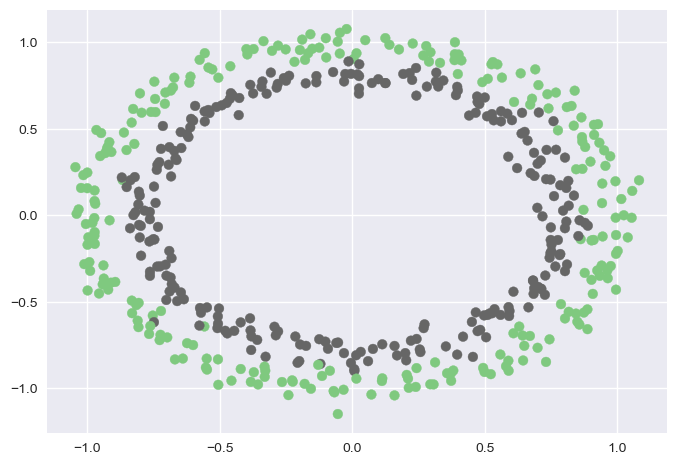

In [17]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [19]:
print(Y)

[1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 0 0 1 1 0 

In [23]:
y_oht = one_hot(Y,2)
print(y_oht)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 

In [18]:
model = NeuralNetwork(input_sz=2, layers=[10,4],output_sz=2)

NameError: name 'seed' is not defined